# Employee Promotion Prediction


## Background

Employee Promotion means the ascension of an employee to higher ranks, this aspect of the job is what drives employees the most.
The ultimate reward for dedication and loyalty towards an organization and HR team plays an important role in handling all these promotion tasks based on ratings and other attributes available.

The HR team in JMD company stored data of promotion cycle last year, which consists of details of all the employees in the company working last year and also
if they got promoted or not, but every time this process gets delayed due to so many details available for each employee - it gets difficult to compare and decide.

So this time HR team wants to utilize the stored data to make a model, that will predict if a person is eligible for promotion or not.

As a data scientist at JMD company, need to come up with a model that will help the HR team to predict if a person is eligible for promotion or not.

#### Objective

Explore and visualize the dataset.
Build a classification model to predict if the customer has a higher probability of getting a promotion
Optimize the model using appropriate techniques
Generate a set of insights and recommendations that will help the company


## Data Description
* employee_id: Unique ID for the employee
* department: Department of employee
* region: Region of employment (unordered)
* education: Education Level
* gender: Gender of Employee
* recruitment_channel: Channel of recruitment for employee
* no_ of_ trainings: no of other trainings completed in the previous year on soft skills, technical skills, etc.
* age: Age of Employee
* previous_ year_ rating: Employee Rating for the previous year
* length_ of_ service: Length of service in years
* awards_ won: if awards won during the previous year then 1 else 0
* avg_ training_ score: Average score in current training evaluations
* is_promoted: (Target) Recommended for promotion

## Importing libraries

In [154]:
# This will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores, and split data
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
)
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

## Loading Data

In [2]:
# Loading the dataset
df = pd.read_csv("employee_promotion.csv")

## Data Overview

In [3]:
# let's view the first 5 rows of the data
df.shape

(54808, 13)

* The dataset has 54808 rows and 13 columns 

In [4]:
# let's view the last 5 rows of the data
df.tail()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.000,17,0,78.000,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.000,6,0,56.000,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.000,3,0,79.000,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.000,2,0,NaN,0
54807,51526,HR,region_22,Bachelor's,m,other,1,27,1.000,5,0,49.000,0


In [5]:
# let's check the data types of the columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won            54808 non-null  int64  
 11  avg_training_score    52248 non-null  float64
 12  is_promoted           54808 non-null  int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 5.4+ MB


* There are null values in the education, previous_year_rating and avg_training_score.
* 5 columns are of object type rest all are numerical.

### Fixing the data types

In [21]:
cols = df.select_dtypes(['object'])
cols.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel'], dtype='object')

In [22]:

for i in cols.columns:
    df[i] = df[i].astype('category')

In [24]:
df['is_promoted'] = df['is_promoted'].astype('category')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   department            54808 non-null  category
 1   region                54808 non-null  category
 2   education             52399 non-null  category
 3   gender                54808 non-null  category
 4   recruitment_channel   54808 non-null  category
 5   no_of_trainings       54808 non-null  int64   
 6   age                   54808 non-null  int64   
 7   previous_year_rating  50684 non-null  float64 
 8   length_of_service     54808 non-null  int64   
 9   awards_won            54808 non-null  int64   
 10  avg_training_score    52248 non-null  float64 
 11  is_promoted           54808 non-null  category
dtypes: category(6), float64(2), int64(4)
memory usage: 2.8 MB


* Converted all object and categorical dataset to category datatype

In [6]:
# let's check for duplicate values in the data
df.duplicated().sum()

0

In [7]:
# let's check for missing values in the data
round(df.isnull().sum() / df.isnull().count() * 100, 2)

employee_id            0.000
department             0.000
region                 0.000
education              4.400
gender                 0.000
recruitment_channel    0.000
no_of_trainings        0.000
age                    0.000
previous_year_rating   7.520
length_of_service      0.000
awards_won             0.000
avg_training_score     4.670
is_promoted            0.000
dtype: float64

- education has 4% missing values
- previous_year_rating has 7.5% missing values
- avg_training_score has 7.5% missing values
-  We will impute these values after splitting the data into train,validation and test sets.

In [9]:
# Checking for the null value in the dataset
df.isna().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
awards_won                 0
avg_training_score      2560
is_promoted                0
dtype: int64

**Let's check the number of unique values in each column**

In [11]:
df.nunique()

employee_id             54808
department                  9
region                     34
education                   3
gender                      2
recruitment_channel         3
no_of_trainings            10
age                        41
previous_year_rating        5
length_of_service          35
awards_won                  2
avg_training_score         59
is_promoted                 2
dtype: int64

In [12]:
# let's view the statistical summary of the numerical columns in the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
employee_id,54808.000,39195.831,22586.581,1.000,19669.750,39225.500,58730.500,78298.000
no_of_trainings,54808.000,1.253,0.609,1.000,1.000,1.000,1.000,10.000
age,54808.000,34.804,7.660,20.000,29.000,33.000,39.000,60.000
previous_year_rating,50684.000,3.329,1.260,1.000,3.000,3.000,4.000,5.000
length_of_service,54808.000,5.866,4.265,1.000,3.000,5.000,7.000,37.000
awards_won,54808.000,0.023,0.150,0.000,0.000,0.000,0.000,1.000
avg_training_score,52248.000,63.712,13.522,39.000,51.000,60.000,77.000,99.000
is_promoted,54808.000,0.085,0.279,0.000,0.000,0.000,0.000,1.000


#### Observations:
* employee_id: It is a unique identifier for employess and can be dropped as it wouldn't help on analysis.
* no_of_trainings: Average no of trainings that employees did previous year is around 1.
* Age: Average age of employess is  around 35 yrs, with minimum age of 20 yrs and max of 60 yrs.
* previous_year_rating: Mean rating that empolyess received is around 3. Best rating is 5 and minium is 1.
* length_of_service: Average length of service is around 6 with maximum of 37 and minimum length of service is 1.
* awards_won: Maximum no of award won is 1.
* avg_training_score: The Mean average training score is 64, maximum is 99 and minimum score is 39.

**Checking the value count for each category of categorical variables** 

In [26]:
# Making a list of all catrgorical variables
for i in df.describe(include=["category"]).columns:
    print("Unique values in", i, "are :")
    print(df[i].value_counts())
    print("*" * 50)

Unique values in department are :
Sales & Marketing    16840
Operations           11348
Procurement           7138
Technology            7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64
**************************************************
Unique values in region are :
region_2     12343
region_22     6428
region_7      4843
region_15     2808
region_13     2648
region_26     2260
region_31     1935
region_4      1703
region_27     1659
region_16     1465
region_28     1318
region_11     1315
region_23     1175
region_29      994
region_32      945
region_19      874
region_20      850
region_14      827
region_25      819
region_17      796
region_5       766
region_6       690
region_30      657
region_8       655
region_10      648
region_1       610
region_24      508
region_12      500
region_9       420
region_21      411
region_3       346
region_34      292
reg

**Observations**
* department: There are 9 unique departments and majority of employess work in Sales and Marketing deparment.
* region:There 34 unique regions and majority of employees are located at region_2 
* Education:Employees have 3 unique degree and majority of them have Bachelors degree and has missing values, we will impute null values. 
* gender: Majority of employees are Male.
* recruitment_channel: There are 3 unique recruitment channel and majority of employess got hired 'other' category sourcing channel.

## Data Pre-processing

In [20]:
# employee_id consists of uniques ID for clients and hence will not add value to the modeling
df.drop(["employee_id"], axis=1, inplace=True)

#### Impute missing values.

In [64]:
imp_mode = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
cols_to_impute = ["education"]

# fit and transform the imputer on train data
df[cols_to_impute] = imp_mode.fit_transform(df[cols_to_impute])

In [65]:
df.education.unique()

array(["Master's & above", "Bachelor's", 'Below Secondary'], dtype=object)

In [66]:
df['previous_year_rating'].fillna(df.previous_year_rating.median(),inplace = True)
df['avg_training_score'].fillna(df.avg_training_score.median(),inplace = True)

In [67]:
# let's again check for missing values in the data
round(df.isnull().sum() / df.isnull().count() * 100, 2)

department             0.000
region                 0.000
education              0.000
gender                 0.000
recruitment_channel    0.000
no_of_trainings        0.000
age                    0.000
previous_year_rating   0.000
length_of_service      0.000
awards_won             0.000
avg_training_score     0.000
is_promoted            0.000
dtype: float64

* Treated missing values

## Univariate analysis

In [16]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [27]:
#create a variable to get list of numerical columns
num_col=df.select_dtypes(include=np.number).columns.tolist()

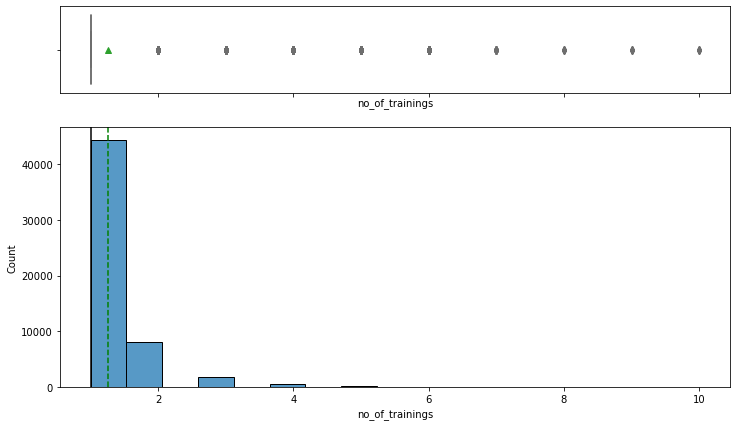

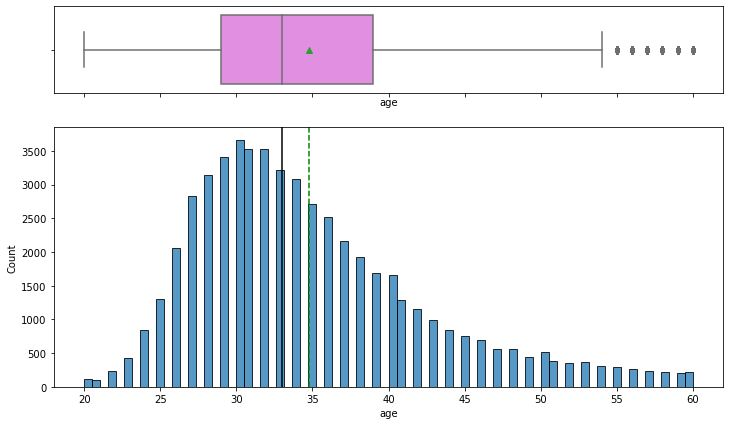

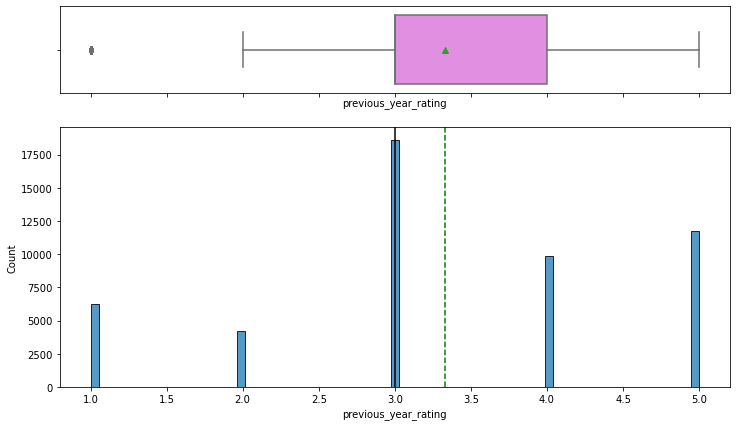

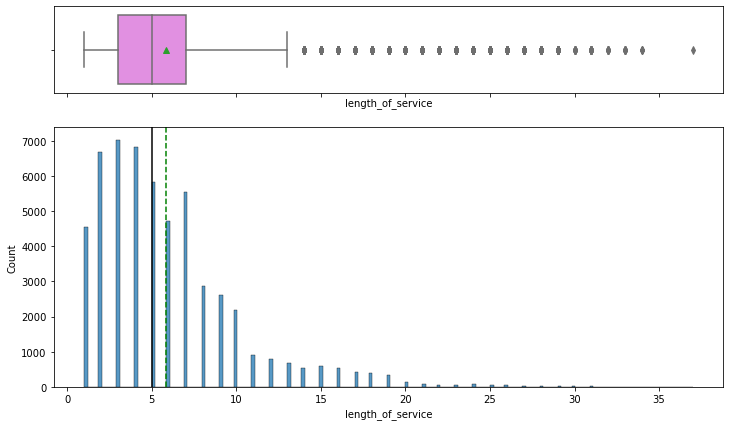

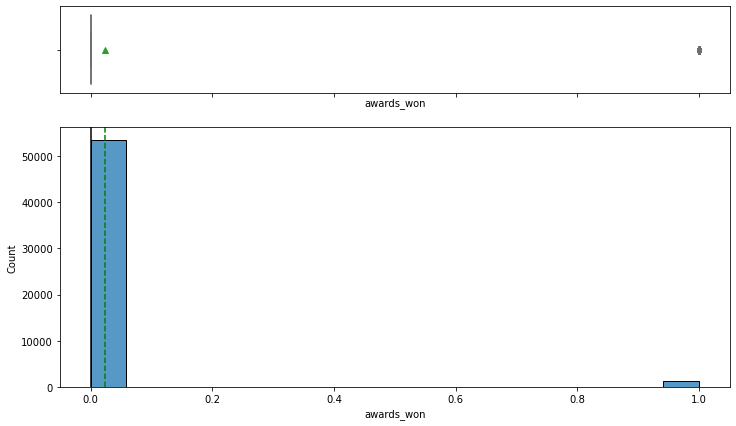

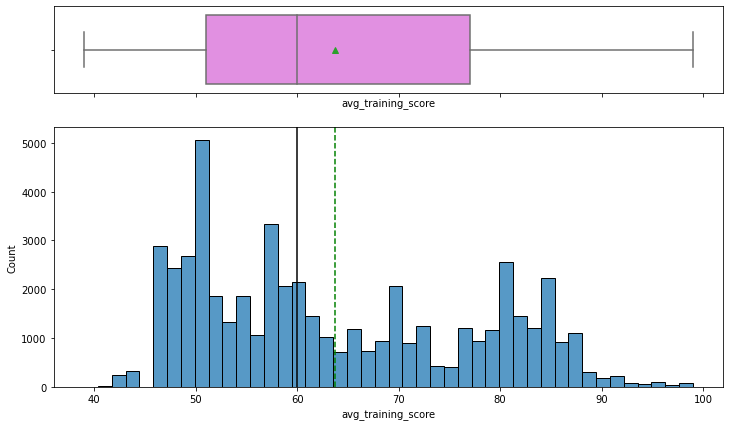

In [28]:
#Create to both histgram and boxplot graph for all numerical columns.
for i in num_col:
    histogram_boxplot(df, i) # Call hist_box function for each column.

### Observations

- The distribution of no_of_trainings is heavily right-skewed
- Majoirty of employees have training between 1 to 2 yrs.
- The distribution of the age is slightly right-skewed.
- Median age employees is around 35 yrs
- Majority of employees have about  3
- The distribution of length_of_service is heavily right-skewed
- Median years of employees service is around 6 yrs.
- The distribution of awards_won is heavily right-skewed
- Majority of users won 0 to 1 award.
- Majority of users have earning score about 50 with median score 60 0 to 1 award.
- There are outliers  -  we will not treat outliers on our analysis, as we expected outlier in production scenarios.

In [ ]:


# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [32]:
cat_cols = df.select_dtypes(['category'])

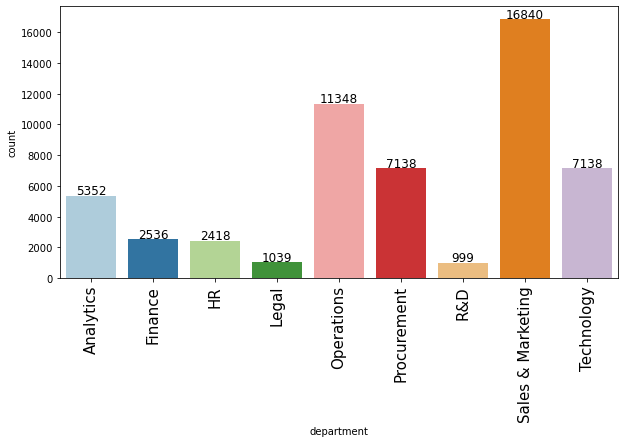

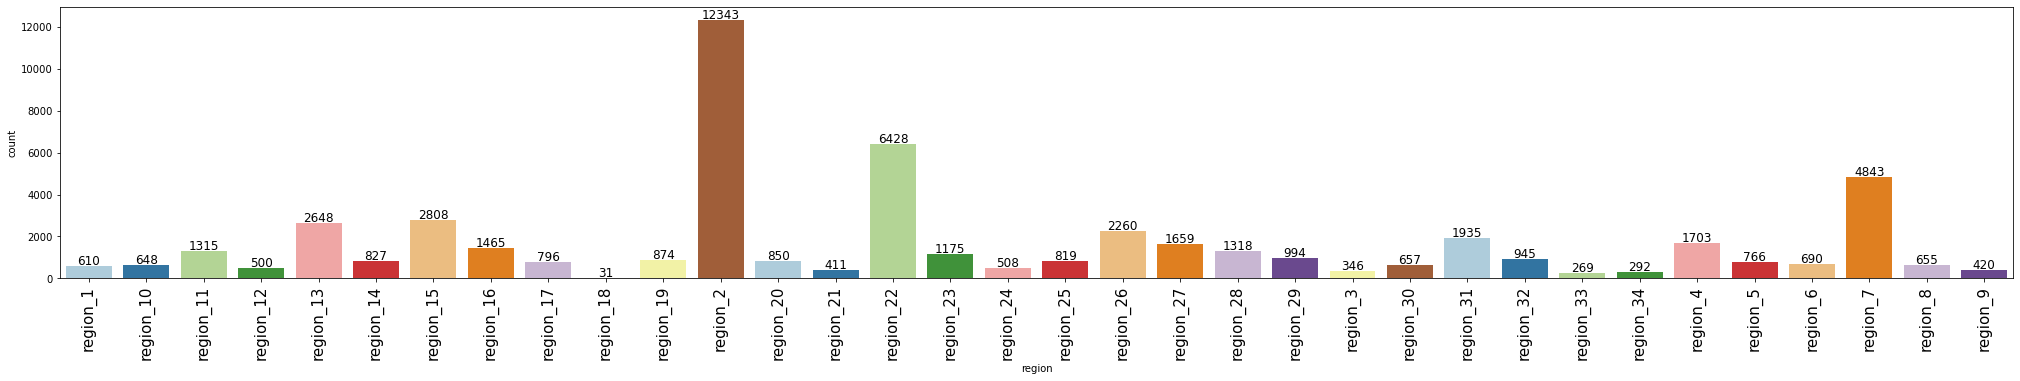

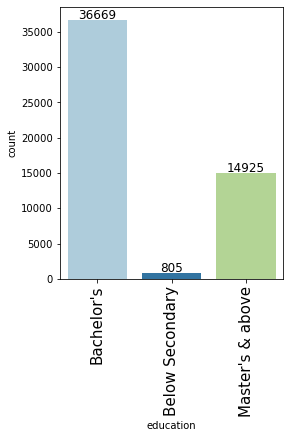

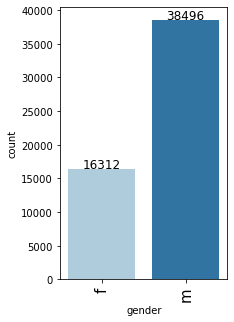

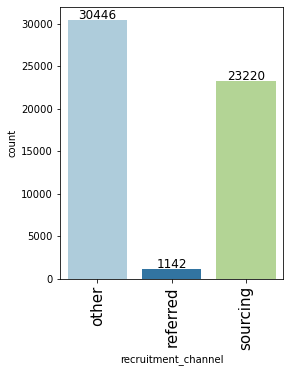

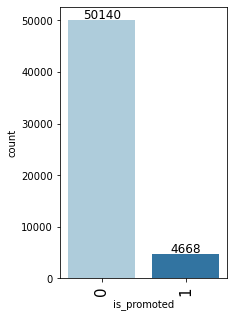

In [33]:
#Create to both label graph for all categorical columns.
for i in cat_cols:
    labeled_barplot(df, i) # Call hist_box function for each column.

### Observations

- Majority of employees are in Sale & Marketing followed by Operations then Technology and Procurement departments.
- Most of the employees are from region_2 follwed by region_22 and then region_7
- Decision of employees promotion shouldn't be region. This will create bias in decision. We will not consider region on our modeling.
- Majority of employees have Bachelors degree followed by Masters& above and then secondary degree
- Majority of the employees are Male.
- Majority of employed are hired through Other recruitment channel followed sourcing and referred.
- There is very less percentage employees are promoted.

## Bivariate Analysis

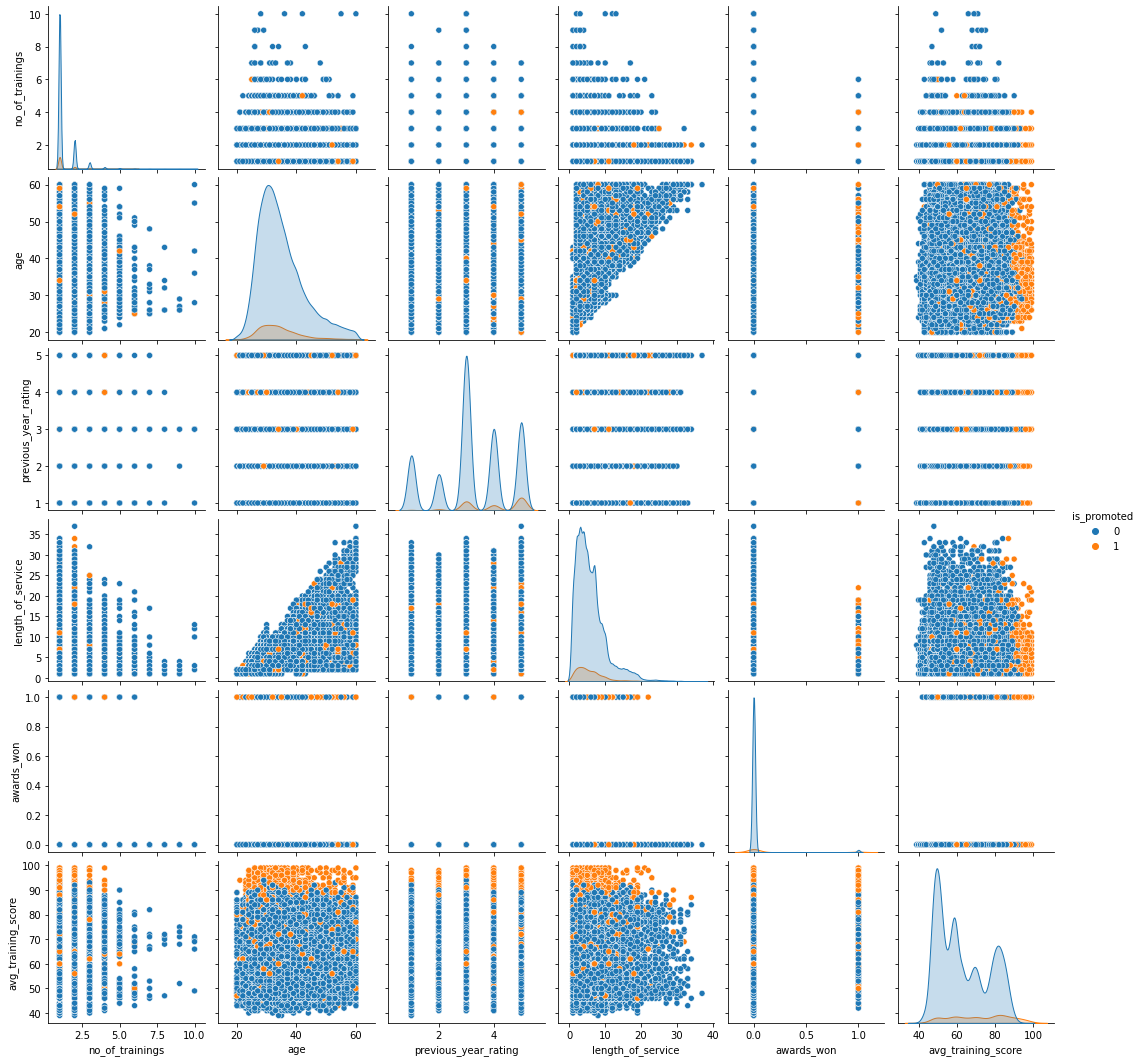

In [34]:
sns.pairplot(df, hue="is_promoted")

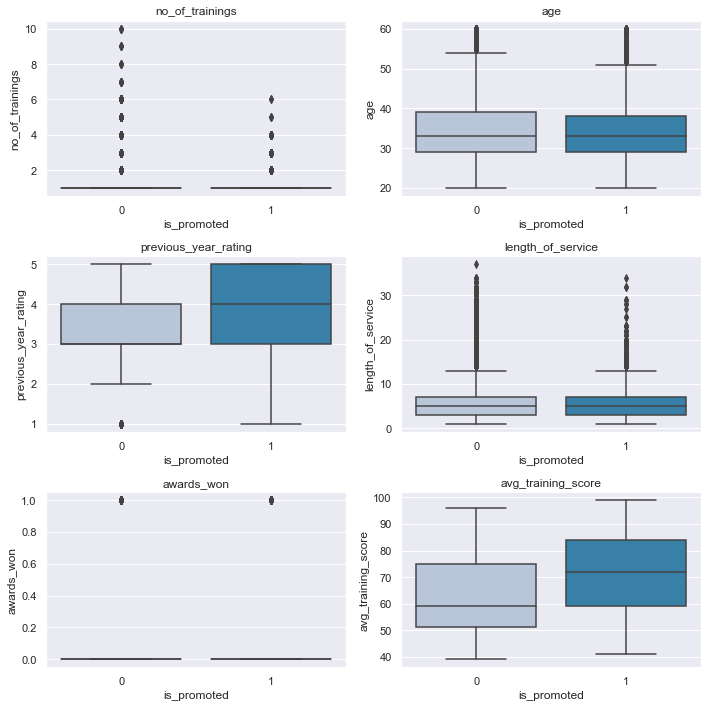

In [44]:
plt.figure(figsize=(10,10))

for i, variable in enumerate(num_col):
                     plt.subplot(3,2,i+1)
                     sns.boxplot(df["is_promoted"],df[variable],palette="PuBu")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

* **is_promoted vs no_of_training**:
    * employees who developed new skills in previous year were promoted.
    

* **is_promoted vs age**
    * Employees with age between 28 to 37 years were promoted
    
* **is_promoted vs Previous year rating**
    * Employess who recieved  rating between 3 to 5 were selected for promotion.

* **is_promoted vs length of service**
    * Length of service didn't affect on promotion.

* **is_promoted vs awards_won**
    * employess won awards can increase change for promotion.

* **is_promoted vs avg_training_score**
    * employees with avg training score of 60-75 were selected for promotion.
    

In [45]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

is_promoted            0     1    All
department                           
All                50140  4668  54808
Sales & Marketing  15627  1213  16840
Operations         10325  1023  11348
Technology          6370   768   7138
Procurement         6450   688   7138
Analytics           4840   512   5352
Finance             2330   206   2536
HR                  2282   136   2418
R&D                  930    69    999
Legal                986    53   1039
------------------------------------------------------------------------------------------------------------------------


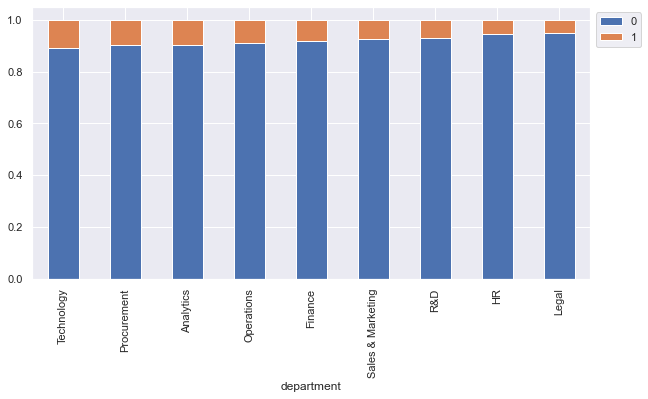

is_promoted      0     1    All
region                         
All          50140  4668  54808
region_2     11354   989  12343
region_22     5694   734   6428
region_7      4327   516   4843
region_4      1457   246   1703
region_13     2418   230   2648
region_15     2586   222   2808
region_28     1164   154   1318
region_26     2117   143   2260
region_23     1038   137   1175
region_27     1528   131   1659
region_31     1825   110   1935
region_17      687   109    796
region_25      716   103    819
region_16     1363   102   1465
region_11     1241    74   1315
region_14      765    62    827
region_30      598    59    657
region_1       552    58    610
region_19      821    53    874
region_8       602    53    655
region_10      597    51    648
region_20      801    49    850
region_29      951    43    994
region_32      905    40    945
region_3       309    37    346
region_5       731    35    766
region_12      467    33    500
region_6       658    32    690
region_2

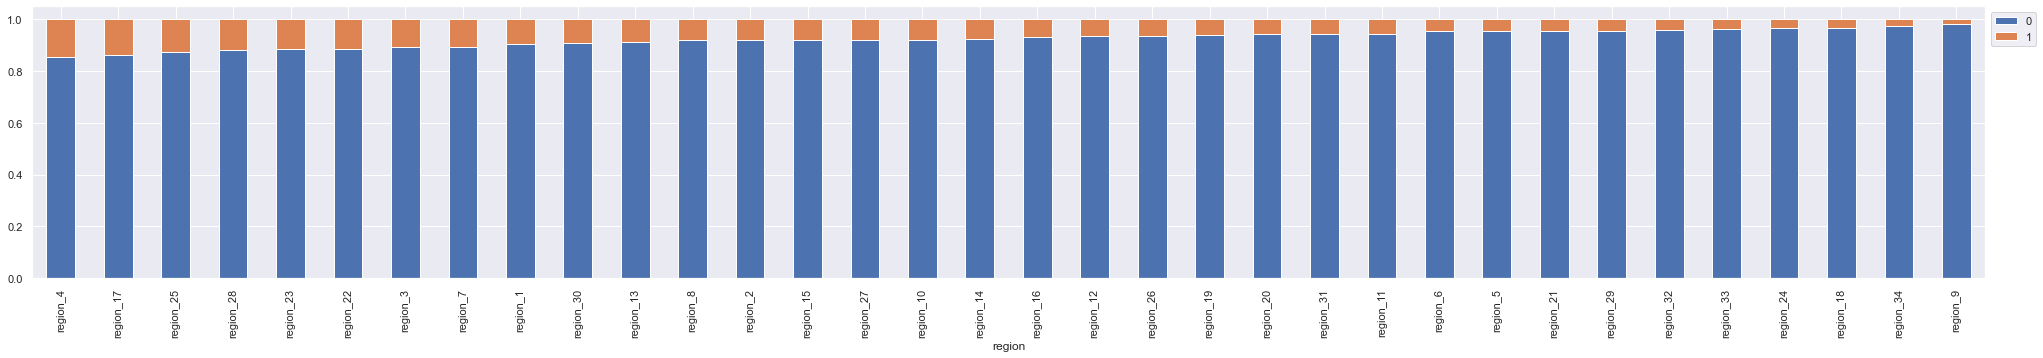

is_promoted           0     1    All
education                           
All               47853  4546  52399
Bachelor's        33661  3008  36669
Master's & above  13454  1471  14925
Below Secondary     738    67    805
------------------------------------------------------------------------------------------------------------------------


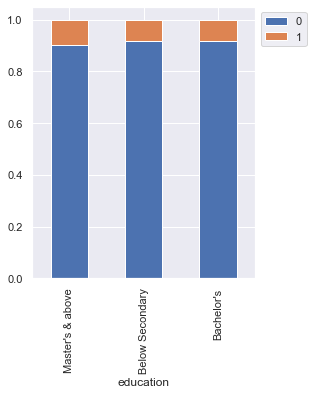

is_promoted      0     1    All
gender                         
All          50140  4668  54808
m            35295  3201  38496
f            14845  1467  16312
------------------------------------------------------------------------------------------------------------------------


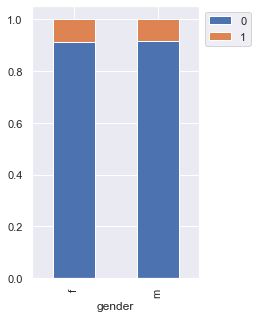

is_promoted              0     1    All
recruitment_channel                    
All                  50140  4668  54808
other                27890  2556  30446
sourcing             21246  1974  23220
referred              1004   138   1142
------------------------------------------------------------------------------------------------------------------------


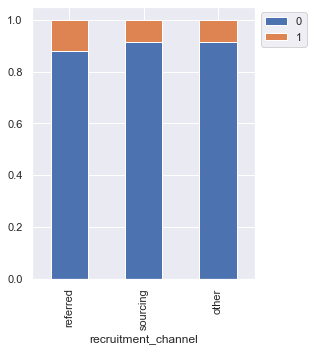

is_promoted      0     1    All
is_promoted                    
1                0  4668   4668
All          50140  4668  54808
0            50140     0  50140
------------------------------------------------------------------------------------------------------------------------


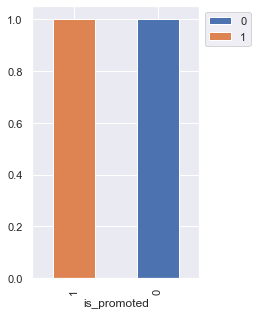

In [46]:
#Create to both label graph for all categorical columns.
for i in cat_cols:
    stacked_barplot(df, i,"is_promoted") # Call hist_box function for each column.

### Observations

- Sales & marketing, Operations, Technology and Procurement have higher no of promotions.
- regions with more no of employees have more promotions.
- education category with more no of employees recived more promotions.
- Gender category percentage when compared total no of employees in category received proportionate promotions
- recruitment  channel category with more no of employees received more promotions.


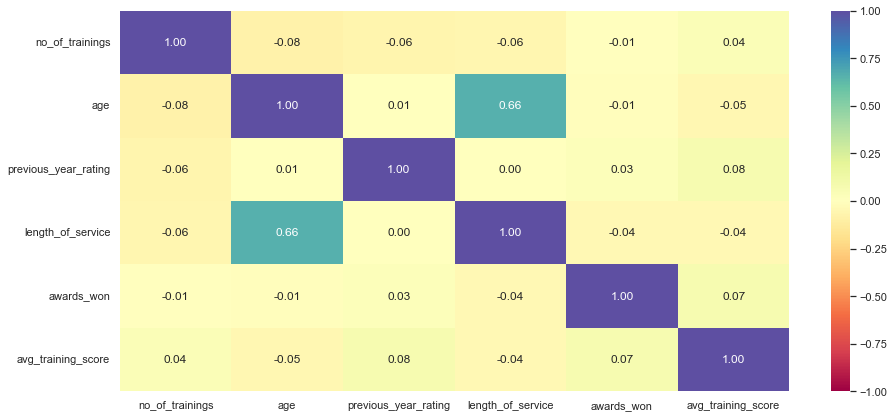

In [48]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

- Age and length of service  have positive correlation.
- Other variables have no significant correlation between them

### Data Preparation for Modeling

### Split data

In [142]:
df.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.000,8,0,49.000,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.000,4,0,60.000,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.000,7,0,50.000,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.000,10,0,50.000,0
4,Technology,region_26,Bachelor's,m,other,1,45,3.000,2,0,73.000,0


In [121]:
data = df.copy()

In [123]:
# apply scaler function to normalize the data
scale = StandardScaler()
data[num_col]=scale.fit_transform(data[num_col])
n_df = data[num_col]
n_df.head()

,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score
0,-0.415,0.026,1.396,0.500,-0.154,-1.099
1,-0.415,-0.627,1.396,-0.437,-0.154,-0.268
2,-0.415,-0.105,-0.251,0.266,-0.154,-1.024
3,1.226,0.548,-1.897,0.969,-0.154,-1.024
4,-0.415,1.331,-0.251,-0.906,-0.154,0.715


In [126]:
# we will drop the region to remove bias in the dataset
X = data.drop(["is_promoted","region"], axis=1)
y = data["is_promoted"]

In [127]:
X.head()

,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score
0,Sales & Marketing,Master's & above,f,sourcing,-0.415,0.026,1.396,0.500,-0.154,-1.099
1,Operations,Bachelor's,m,other,-0.415,-0.627,1.396,-0.437,-0.154,-0.268
2,Sales & Marketing,Bachelor's,m,sourcing,-0.415,-0.105,-0.251,0.266,-0.154,-1.024
3,Sales & Marketing,Bachelor's,m,other,1.226,0.548,-1.897,0.969,-0.154,-1.024
4,Technology,Bachelor's,m,other,-0.415,1.331,-0.251,-0.906,-0.154,0.715


In [128]:
# Splitting data into training, validation and test sets:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(32884, 10) (10962, 10) (10962, 10)


In [129]:
# Creating dummy variables for categorical variables
X_train = pd.get_dummies(data=X_train, drop_first=True)
X_val = pd.get_dummies(data=X_val, drop_first=True)
X_test = pd.get_dummies(data=X_test, drop_first=True)

In [130]:
print(X_train.shape, X_val.shape, X_test.shape)

(32884, 19) (10962, 19) (10962, 19)


In [131]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [132]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Model with original data

In [171]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))


print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_train, model.predict(X_train))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores_val = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance:

Bagging: 0.8275
Random forest: 0.9392857142857143
GBM: 0.29285714285714287
Adaboost: 0.16892857142857143
Xgboost: 0.3703571428571429
dtree: 0.9342857142857143

Validation Performance:

Bagging: 0.3286937901498929
Random forest: 0.30620985010706636
GBM: 0.2965738758029979
Adaboost: 0.16381156316916487
Xgboost: 0.32548179871520344
dtree: 0.3811563169164882


### Performance comparison
- dtree has the better performance on the validation followed by Xgboost and bagging, but results are no where near to training performance.

## Models with Oversampled data

In [172]:
print("Before Oversampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After Oversampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label 'Yes': 2800
Before Oversampling, counts of label 'No': 30084 

After Oversampling, counts of label 'Yes': 30084
After Oversampling, counts of label 'No': 30084 

After Oversampling, the shape of train_X: (60168, 19)
After Oversampling, the shape of train_y: (60168,) 



In [173]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))


print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_train_over, model.predict(X_train_over))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Training Performance:

Bagging: 0.9873687009706156
Random forest: 0.9957452466427337
GBM: 0.844635021938572
Adaboost: 0.7505650844302619
Xgboost: 0.9352812126047069
dtree: 0.9940832336125516

Validation Performance:

Bagging: 0.34582441113490364
Random forest: 0.37366167023554603
GBM: 0.4593147751605996
Adaboost: 0.5556745182012848
Xgboost: 0.3265524625267666
dtree: 0.36509635974304067


### Performance comparison
- Adaboost has the better performance on validation followed by GBM. but result are not in acceptle range.

## Models with Undersampled data

In [136]:
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [174]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 2800
Before Under Sampling, counts of label 'No': 30084 

After Under Sampling, counts of label 'Yes': 2800
After Under Sampling, counts of label 'No': 2800 

After Under Sampling, the shape of train_X: (5600, 19)
After Under Sampling, the shape of train_y: (5600,) 



In [175]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))


print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_train_un, model.predict(X_train_un))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Training Performance:

Bagging: 0.9603571428571429
Random forest: 0.9960714285714286
GBM: 0.6271428571428571
Adaboost: 0.6635714285714286
Xgboost: 0.8060714285714285
dtree: 0.9939285714285714

Validation Performance:

Bagging: 0.5974304068522484
Random forest: 0.6552462526766595
GBM: 0.6156316916488223
Adaboost: 0.6755888650963597
Xgboost: 0.6252676659528907
dtree: 0.6488222698072805


### Performance comparison
- Adaboost has the better performance followed by RandomForest close to Dtree as per the validation performance

## Which models should be tuned?
- AdaBoost with undersample and dtree models have consistent and good performance for all 2 datasets.
- So, we will tune these 2 models.
- Sometimes models might overfit after undersampling and oversampling, so it's better to tune models with both undersampled data and original data

## Tuning Adaboost

### Tuning with Undersampled data

In [144]:
%%time

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
from sklearn import metrics

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 90, 'learning_rate': 1, 'base_estimator': DecisionTreeClassifier(max_depth=1, random_state=1)} with CV score=0.6735714285714286:
Wall time: 36.6 s


In [145]:
tuned_adb1 = AdaBoostClassifier(
    random_state=1,
    n_estimators=90,
    learning_rate=0.2,
    base_estimator=DecisionTreeClassifier(max_depth=3, random_state=1),
)
tuned_adb1.fit(X_train_un, y_train_un)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.2, n_estimators=90, random_state=1)

In [146]:
# Checking model's performance on training set
adb1_train = model_performance_classification_sklearn(
    tuned_adb1, X_train_un, y_train_un
)
adb1_train

,Accuracy,Recall,Precision,F1
0,0.762,0.665,0.824,0.736


In [147]:
# Checking model's performance on validation set
adb1_val = model_performance_classification_sklearn(tuned_adb1, X_val, y_val)
adb1_val

,Accuracy,Recall,Precision,F1
0,0.803,0.618,0.243,0.348


### Tuning with Original data

In [148]:
%%time

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 70, 'learning_rate': 1, 'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.3167857142857143:
Wall time: 2min 43s


In [149]:
tuned_adb2 = AdaBoostClassifier(
    random_state=1,
    n_estimators=90,
    learning_rate=0.2,
    base_estimator=DecisionTreeClassifier(max_depth=3, random_state=1),
)
tuned_adb2.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.2, n_estimators=90, random_state=1)

In [151]:
# Checking model's performance on training set
adb2_train = model_performance_classification_sklearn(tuned_adb2, X_train, y_train)
adb2_train

,Accuracy,Recall,Precision,F1
0,0.940,0.299,0.984,0.459


In [152]:
# Checking model's performance on validation set
adb2_val = model_performance_classification_sklearn(tuned_adb2, X_val, y_val)
adb2_val

,Accuracy,Recall,Precision,F1
0,0.937,0.286,0.927,0.437


###  Tuning Decision Tree

### Hyperparameter Tuning
**We will tune decision tree using GridSearchCV and RandomizedSearchCV. We will also compare the performance and time taken by these two methods - grid search and randomized search.**

### GridSearchCV

In [155]:
# Creating pipeline
model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in GridSearchCV
param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [3, 4, 5, None],
    "min_samples_split": [2, 4, 7, 10, 15],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scorer, cv=5)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

Best Parameters:{'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2} 
Score: 0.39035714285714285


In [156]:
# Creating new pipeline with best parameters
dtree_tuned1 = DecisionTreeClassifier(
    random_state=1, criterion="gini", max_depth=None, min_samples_split=2
)

# Fit the model on training data
dtree_tuned1.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [157]:
# Calculating different metrics on train set
dtree_grid_train = model_performance_classification_sklearn(
    dtree_tuned1, X_train, y_train
)
print("Training performance:")
dtree_grid_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.994,0.934,0.998,0.965


In [158]:
# Calculating different metrics on validation set
dtree_grid_val = model_performance_classification_sklearn(dtree_tuned1, X_val, y_val)
print("Validation performance:")
dtree_grid_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.888,0.381,0.352,0.366


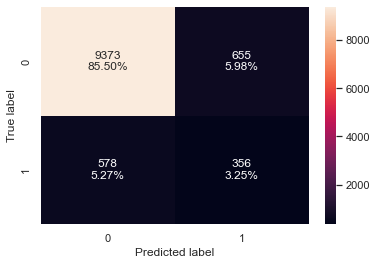

In [159]:
# creating confusion matrix
confusion_matrix_sklearn(dtree_tuned1, X_val, y_val)

## RandomizedSearchCV

In [160]:
# Creating pipeline
model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomizedSearchCV
param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [3, 4, 5, None],
    "min_samples_split": [2, 4, 7, 10, 15],
}
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=20,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

Best parameters are {'min_samples_split': 2, 'max_depth': None, 'criterion': 'entropy'} with CV score=0.39035714285714285:


In [161]:
# Creating new pipeline with best parameters
dtree_tuned2 = DecisionTreeClassifier(
    random_state=1, criterion="entropy", max_depth=None, min_samples_split=2
)

# Fit the model on training data
dtree_tuned2.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=1)

In [162]:
# Calculating different metrics on train set
dtree_random_train = model_performance_classification_sklearn(
    dtree_tuned2, X_train, y_train
)
print("Training performance:")
dtree_random_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.994,0.934,0.998,0.965


In [163]:
# Calculating different metrics on validation set
dtree_random_val = model_performance_classification_sklearn(dtree_tuned2, X_val, y_val)
print("Validation performance:")
dtree_random_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.884,0.383,0.338,0.359


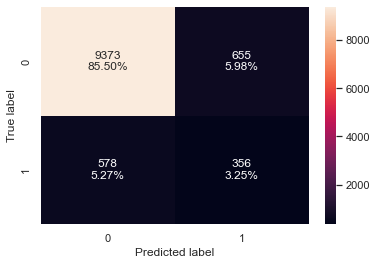

In [164]:
# creating confusion matrix
confusion_matrix_sklearn(dtree_tuned1, X_val, y_val)

In [176]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        dtree_grid_train.T,
        dtree_random_train.T,
        adb1_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree Tuned with Grid search",
    "Decision Tree Tuned with Random search",
    "Adaboost Tuned with underSample",
    
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree Tuned with Grid search,Decision Tree Tuned with Random search,Adaboost Tuned with underSample
Accuracy,0.994,0.994,0.762
Recall,0.934,0.934,0.665
Precision,0.998,0.998,0.824
F1,0.965,0.965,0.736


In [181]:
# Validation performance comparison

models_val_comp_df = pd.concat(
    [
        dtree_grid_val.T,
        dtree_random_val.T,
        adb1_val.T,
        
    ],
    axis=1,
)
models_val_comp_df.columns = [
    "Decision Tree Tuned with Grid search",
    "Decision Tree Tuned with Random search",
    "Adaboost tuned with undersamples",
    
]
print("Validation performance comparison:")
models_val_comp_df

Validation performance comparison:


,Decision Tree Tuned with Grid search,Decision Tree Tuned with Random search,Adaboost tuned with undersamples
Accuracy,0.888,0.884,0.803
Recall,0.381,0.383,0.618
Precision,0.352,0.338,0.243
F1,0.366,0.359,0.348


- We can see that Adaboost with undersample is giving a better performance over Dtree a validation recall of ~0.61
- Let's see the feature importance from the Adaboost model tuned with undersample.

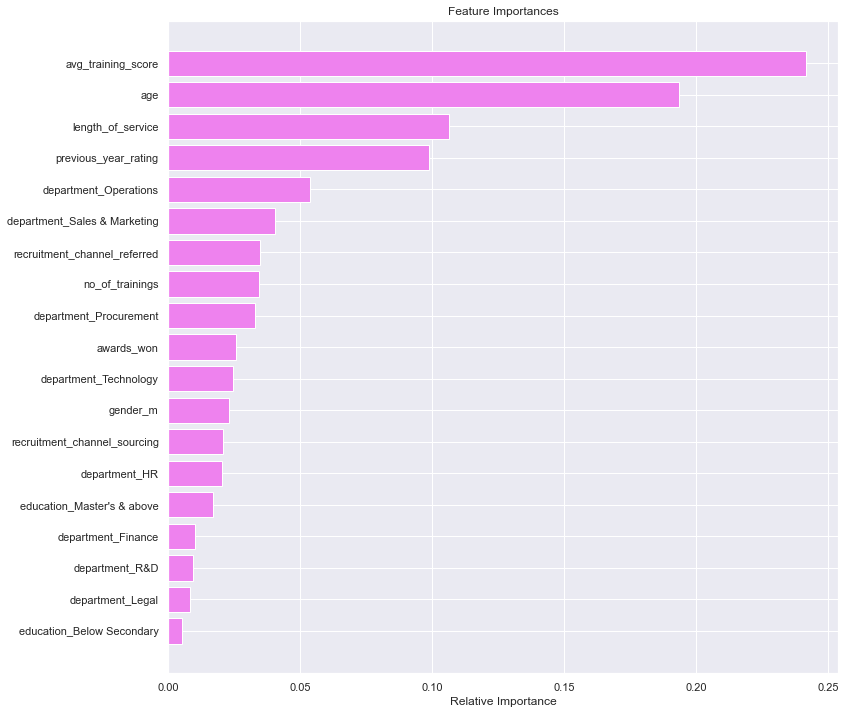

In [182]:
feature_names = X_train.columns
importances = tuned_adb1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- Avergare Train score, Age, Length of Service and Previous year rating play major role to decide employees promtion

## Pipelines for productionizing the model
- Now, we have a final model. let's use pipelines to put the model into production



## Column Transformer
- We know that we can use pipelines to standardize the model building, but the steps in a pipeline are applied to each and every variable - how can we personalize the pipeline to perform different processing on different columns
- Column transformer allows different columns or column subsets of the input to be transformed separately and the features generated by each transformer will be concatenated to form a single feature space. This is useful for heterogeneous or columnar data, to combine several feature extraction mechanisms or transformations into a single transformer.

- We will create 2 different pipelines, one for numerical columns and one for categorical columns
- For numerical columns, we will do missing value imputation as pre-processing
- For categorical columns, we will do one hot encoding and missing value imputation as pre-processing

- We are doing missing value imputation for the whole data, so that if there is any missing value in the data in future that can be taken care of.

In [184]:
# creating a list of numerical variables
numerical_features = ["avg_training_score", "age", "length_of_service","previous_year_rating"]

# creating a transformer for numerical variables, which will apply simple imputer on the numerical variables
numeric_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="median"))])

# creating a list of categorical variables
categorical_features = [
    "department",
    "education",
    "gender",
    "recruitment_channel",
]

# creating a transformer for categorical variables, which will first apply simple imputer and
# then do one hot encoding for categorical variables
categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore")),
    ]
)

# handle_unknown = "ignore", allows model to handle any unknown category in the test data

# combining categorical transformer and numerical transformer using a column transformer

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features),
    ],
    remainder="passthrough",
)
# remainder = "passthrough" has been used, it will allow variables that are present in original data
# but not in "numerical_columns" and "categorical_columns" to pass through the column transformer without any changes

In [189]:
# Separating target variable and other variables
X = data.drop(["is_promoted","region"], axis=1)
Y = data["is_promoted"]

- Now we already know the best model we need to process with, so we don't need to divide data into 3 parts

In [190]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1, stratify=Y
)
print(X_train.shape, X_test.shape)

(38365, 10) (16443, 10)


In [191]:
# Creating new pipeline with best parameters
model = Pipeline(
    steps=[
        ("pre", preprocessor),
        (
            "Adaboost",
            AdaBoostClassifier(
                random_state=1,
                n_estimators=90,
                learning_rate=0.2,
                base_estimator=DecisionTreeClassifier(max_depth=3, random_state=1),
            ),
        ),
    ]
)
# Fit the model on training data
model.fit(X_train, y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['avg_training_score', 'age',
                                                   'length_of_service',
                                                   'previous_year_rating']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['department', 'education',
                                                   'gender',
                                                   'recruitment_channel'])])),
                ('Adaboost',
                 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                                          random_state=1),
                                    learning_rate=0.2, n_estimators=90,
                                    random_state=1))])

## Conclusion and Insights

- The best test recall is ~61% but the test precision is very low i.e ~24% at the same time. This means that the model is not good at predicting employee promotions. therefore, employees may leave the company, if they dont see scope on promotions.   
- The model performance can be improved, especially in terms of precision and recall and the company can use the model to encourge employees  career growth possiblities like providing training to improve high demand skills.
- We saw in our analysis that less number of employees take trainings and have less ratings.
